<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/validity_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

**2. Mount Colab to Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3. Import Dataset**

In [14]:
file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'

data = pd.read_csv(file_path, encoding='latin-1', sep=';')
data.head()

,Timestamp,Email,Nama,NIM,Angkatan,Happiness_Q1,Happiness_Q2,Happiness_Q3,Happiness_Q4,Happiness_Q5,...,TaskSuccess_Q4,TaskSuccess_Q5,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4,Feedback,Error,Suggestion,File
0,3/26/2025 11:44:39,gloriapanjaitan3012@gmail.com,Gloria Panjaitan,11S23030,2023,5,4,4,5,5,...,4,5,Leaderboard,Tidak,Tidak,Lebih seru dan menarik,Sudah di upload,Sudah di upload,Menambahkan animasi sederhana,https://drive.google.com/open?id=1UWwnVxfv8Sn8...
1,3/26/2025 11:45:03,andresaragih932@gmail.com,Andre Christian Saragih,11S23026,2023,5,5,5,5,5,...,5,5,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya,Sangat bagus,Sudah di uppload,Sudah baik,https://drive.google.com/open?id=1yJpmGPuwsZ1A...
2,3/26/2025 11:45:24,firenoobgaming@gmail.com,Josua,11S23033,2023,3,3,5,4,3,...,3,3,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja,Di foto,Banyak,Ada di foto,https://drive.google.com/open?id=1-51jAdyASsbI...
3,3/26/2025 11:46:16,josuaasrgh@gmail.com,Josua Saragih,11S23028,2023,5,5,4,4,4,...,3,4,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar",aplikasi nya bagus untuk memacu mahasiswa untu...,1. tombol back tidak berfungsi dengan baik\n2....,UI nya lebih menarik lagi,NaN
4,3/26/2025 11:47:18,christopasaribu90@gmail.com,Christo Pasaribu,11S23005,2023,5,5,5,4,4,...,4,4,"Point, karena ingin menukar nya dengan hadiah",Tidak,Tidak,Sebelum ada fitur gamifikasi tidak ada niatan ...,NaN,Jumlah soal yang benar tidak sesuai dengan jum...,Menurut saya sudah pass mantapp\n,NaN


**4. Data Pre-Processing**

In [15]:
# Define Likert columns (heart framework aspects)
likert_columns = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                  'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                  'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                  'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                  'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

# Memilih hanya kolom-kolom Likert dan mengonversi ke float
df_likert = data[likert_columns].astype(float)

# Menghitung total skor responden
df_likert["Total_Score"] = df_likert.sum(axis=1)

**5. Run Validity Test**

In [18]:
# Uji Validitas: Korelasi Spearman antara setiap item dengan total skor
validity_results = {}
for col in df_likert.columns[:-1]:  # Kecuali "Total_Score"
    corr, p_value = spearmanr(df_likert[col], df_likert["Total_Score"])
    validity_results[col] = (corr, p_value)

# Mengonversi hasil uji validitas ke DataFrame
validity_df = pd.DataFrame.from_dict(validity_results, orient="index", columns=["Spearman Correlation", "p-value"])

# Menampilkan hasil uji validitas
validity_df

,Spearman Correlation,p-value
Happiness_Q1,0.540713,2.432903e-05
Happiness_Q2,0.549760,1.663915e-05
Happiness_Q3,0.237114,8.428119e-02
Happiness_Q4,0.695251,5.420839e-09
Happiness_Q5,0.715489,1.203768e-09
Engagement_Q1,0.382112,4.354018e-03
Engagement_Q2,0.571600,6.345485e-06
Engagement_Q3,0.651299,9.660648e-08
Engagement_Q4,0.739882,1.637600e-10
Engagement_Q5,0.715501,1.202638e-09


**6. Data Visualization**

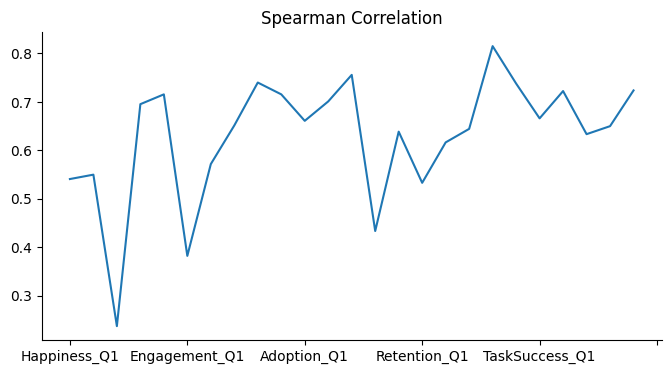

In [21]:
# Plotting Spearman Correlation and p-values
validity_df['Spearman Correlation'].plot(kind='line', figsize=(8, 4), title='Spearman Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

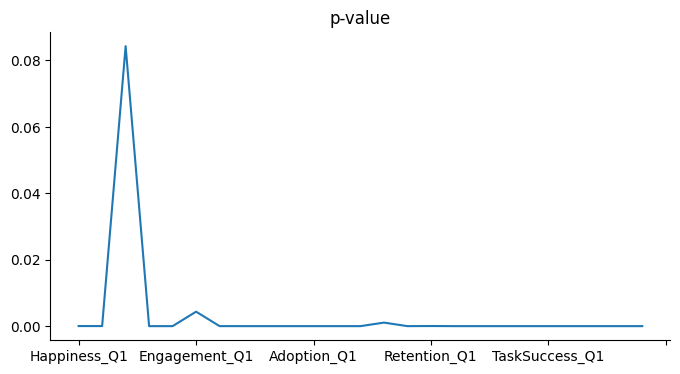

In [20]:
validity_df['p-value'].plot(kind='line', figsize=(8, 4), title='p-value')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()